<a href="https://colab.research.google.com/github/Bhavana-1124/AI-project-Medical-cost-prediction/blob/main/AI_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

"Medical cost prediction"

This project looks at three things—how old you are, your BMI, and how many medical treatments you’ve had—to guess your future healthcare expenses.

Medical expenses are increasing every year.
Hospitals and insurance companies need a way to estimate patient costs in advance.

Medical Cost Prediction is a Machine Learning project that predicts a patient’s medical expenses based on certain health and demographic factors.

Installing all the  necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
from google.colab import files
files.upload()

Saving medical_costs.csv to medical_costs.csv


{'medical_costs.csv': b'age,bmi,procedures_count,smoking_status,alcohol_consumption,chronic_conditions,insurance_plan,hospital_tier,geographic_region,specialty_consultations,diagnostic_tests,emergency_visit,preventive_care,total_cost_usd\n62.0,42.313469096655226,5.0,Non-smoker,Moderate,2.0,Medicare,Tier 2,West,1.0,5.0,Yes,No,21075.41949413862\n40.0,41.72435579281979,5.0,Former,Moderate,3.0,PPO,Tier 2,Northeast,0.0,1.0,No,Yes,43051.67037653763\n80.0,37.68528222063976,5.0,Non-smoker,Moderate,3.0,PPO,Tier 2,Midwest,1.0,0.0,No,,101842.59394406051\n,26.63566523472074,7.0,Non-smoker,None,1.0,Medicare,Tier 3,Midwest,1.0,4.0,No,No,97861.50901187496\n62.0,44.367618375125645,,Non-smoker,None,3.0,HMO,Tier 1,West,,4.0,No,No,\n39.0,39.01529284549848,7.0,Non-smoker,Light,2.0,Medicare,Tier 1,South,2.0,2.0,No,Yes,65673.83556682966\n40.0,43.48925582354106,1.0,Former,None,3.0,Medicare,Tier 2,Midwest,2.0,3.0,No,Yes,71610.28046946347\n29.0,,5.0,Non-smoker,Heavy,1.0,PPO,Tier 2,South,1.0,1.0,No,No,80637.003

Load and Analyse the data

In [3]:
# Load dataset
df = pd.read_csv('/content/medical_costs.csv')

# Display first few rows
df.head()

,age,bmi,procedures_count,smoking_status,alcohol_consumption,chronic_conditions,insurance_plan,hospital_tier,geographic_region,specialty_consultations,diagnostic_tests,emergency_visit,preventive_care,total_cost_usd
0,62.0,42.313469,5.0,Non-smoker,Moderate,2.0,Medicare,Tier 2,West,1.0,5.0,Yes,No,21075.419494
1,40.0,41.724356,5.0,Former,Moderate,3.0,PPO,Tier 2,Northeast,0.0,1.0,No,Yes,43051.670377
2,80.0,37.685282,5.0,Non-smoker,Moderate,3.0,PPO,Tier 2,Midwest,1.0,0.0,No,NaN,101842.593944
3,NaN,26.635665,7.0,Non-smoker,NaN,1.0,Medicare,Tier 3,Midwest,1.0,4.0,No,No,97861.509012
4,62.0,44.367618,NaN,Non-smoker,NaN,3.0,HMO,Tier 1,West,NaN,4.0,No,No,NaN


In [4]:
# it gives you a quick summay of your dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      950 non-null    float64
 1   bmi                      954 non-null    float64
 2   procedures_count         946 non-null    float64
 3   smoking_status           947 non-null    object 
 4   alcohol_consumption      690 non-null    object 
 5   chronic_conditions       952 non-null    float64
 6   insurance_plan           944 non-null    object 
 7   hospital_tier            958 non-null    object 
 8   geographic_region        949 non-null    object 
 9   specialty_consultations  949 non-null    float64
 10  diagnostic_tests         950 non-null    float64
 11  emergency_visit          957 non-null    object 
 12  preventive_care          953 non-null    object 
 13  total_cost_usd           951 non-null    float64
dtypes: float64(7), object(7)


In [5]:
# critical modeling and data-cleaning decisions
df.describe()
print(df.describe())

              age         bmi  procedures_count  chronic_conditions  \
count  950.000000  954.000000        946.000000          952.000000   
mean    51.613684   31.092598          3.498943            1.470588   
std     19.218044    8.070722          2.296650            1.108791   
min     18.000000   17.033035          0.000000            0.000000   
25%     36.000000   24.479103          1.250000            0.000000   
50%     52.000000   30.620206          4.000000            1.000000   
75%     69.000000   38.303786          5.000000            2.000000   
max     84.000000   44.883125          7.000000            3.000000   

       specialty_consultations  diagnostic_tests  total_cost_usd  
count               949.000000        950.000000      951.000000  
mean                  1.920969          2.581053    75701.404276  
std                   1.401880          1.680251    43620.653046  
min                   0.000000          0.000000      636.755449  
25%                   1.0

In [6]:
print(df.head()) #visually inspect the dataset before analysis

    age        bmi  procedures_count smoking_status alcohol_consumption  \
0  62.0  42.313469               5.0     Non-smoker            Moderate   
1  40.0  41.724356               5.0         Former            Moderate   
2  80.0  37.685282               5.0     Non-smoker            Moderate   
3   NaN  26.635665               7.0     Non-smoker                 NaN   
4  62.0  44.367618               NaN     Non-smoker                 NaN   

   chronic_conditions insurance_plan hospital_tier geographic_region  \
0                 2.0       Medicare        Tier 2              West   
1                 3.0            PPO        Tier 2         Northeast   
2                 3.0            PPO        Tier 2           Midwest   
3                 1.0       Medicare        Tier 3           Midwest   
4                 3.0            HMO        Tier 1              West   

   specialty_consultations  diagnostic_tests emergency_visit preventive_care  \
0                      1.0          

Missing value analysis and data imputation

In [7]:
# Check missing values
print("\nMissing Values:")
print(df.isna().sum())


Missing Values:
age                         50
bmi                         46
procedures_count            54
smoking_status              53
alcohol_consumption        310
chronic_conditions          48
insurance_plan              56
hospital_tier               42
geographic_region           51
specialty_consultations     51
diagnostic_tests            50
emergency_visit             43
preventive_care             47
total_cost_usd              49
dtype: int64


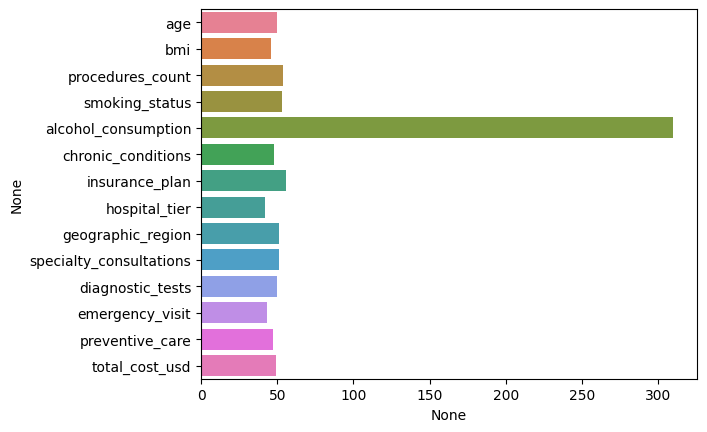

In [8]:
sns.barplot(x=df.isna().sum(),y=df.columns,hue=df.columns)
plt.show()        #visually compare quantities across categories.

In [9]:
# Impute numerical columns with median
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in num_cols:
    df[col].fillna(df[col].mean(), inplace=True)

# Impute categorical columns with mode
cat_cols = df.select_dtypes(include=['object']).columns

for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

/tmp/ipython-input-905540202.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
/tmp/ipython-input-905540202.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using '

In [10]:
print("\nAfter Imputation Missing Values:")
print(df.isna().sum())


After Imputation Missing Values:
age                        0
bmi                        0
procedures_count           0
smoking_status             0
alcohol_consumption        0
chronic_conditions         0
insurance_plan             0
hospital_tier              0
geographic_region          0
specialty_consultations    0
diagnostic_tests           0
emergency_visit            0
preventive_care            0
total_cost_usd             0
dtype: int64


REMOVE DUPLICATE RECORDS

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

SAVED CLEANED DATASET

In [14]:
df.to_csv('medical_costs_cleaned.csv', index=False)

In [15]:
print("Cleaned Dataset Saved Successfully")

Cleaned Dataset Saved Successfully


In [16]:
# Recheck missing values
df.isnull().sum()

,0
age,0
bmi,0
procedures_count,0
smoking_status,0
alcohol_consumption,0
chronic_conditions,0
insurance_plan,0
hospital_tier,0
geographic_region,0
specialty_consultations,0


EDA and Data Visualization

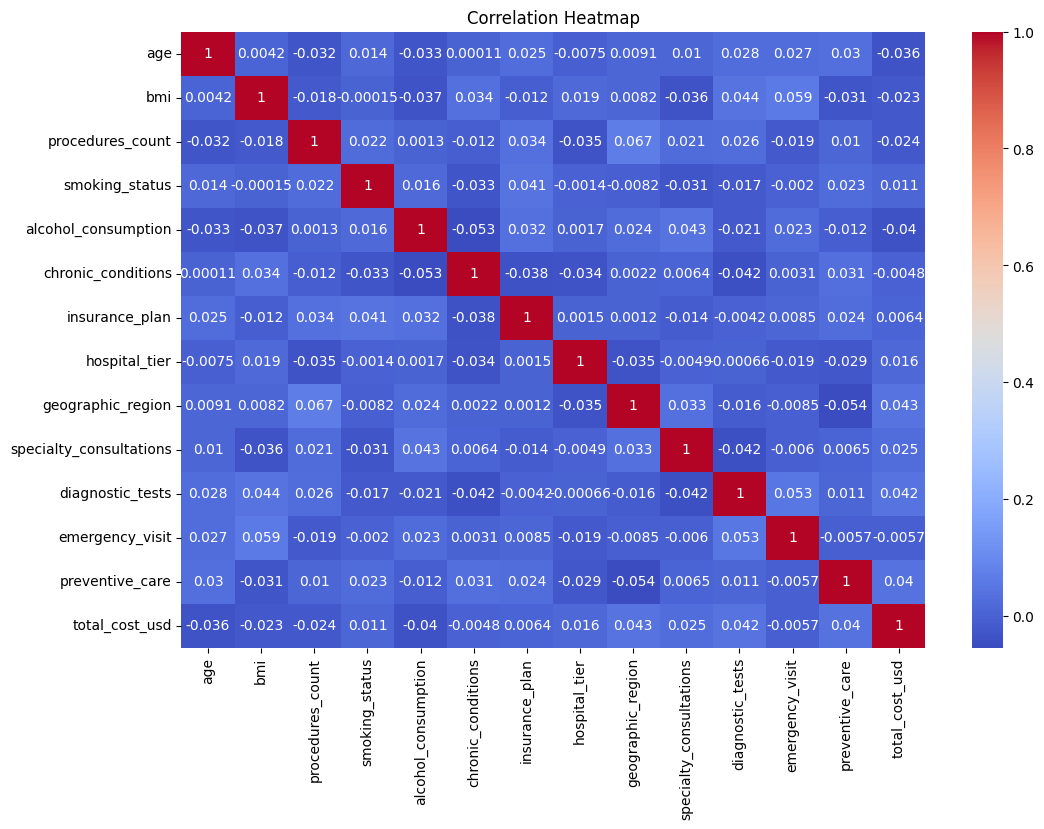

In [17]:
from sklearn.preprocessing import LabelEncoder

# Instantiate LabelEncoder
le = LabelEncoder()

# Identify all current object-type columns that need encoding
cat_cols_to_encode = df.select_dtypes(include=['object']).columns

# Apply LabelEncoder to each identified categorical column
for col in cat_cols_to_encode:
    df[col] = le.fit_transform(df[col])

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()     #  see how variables are related to each other

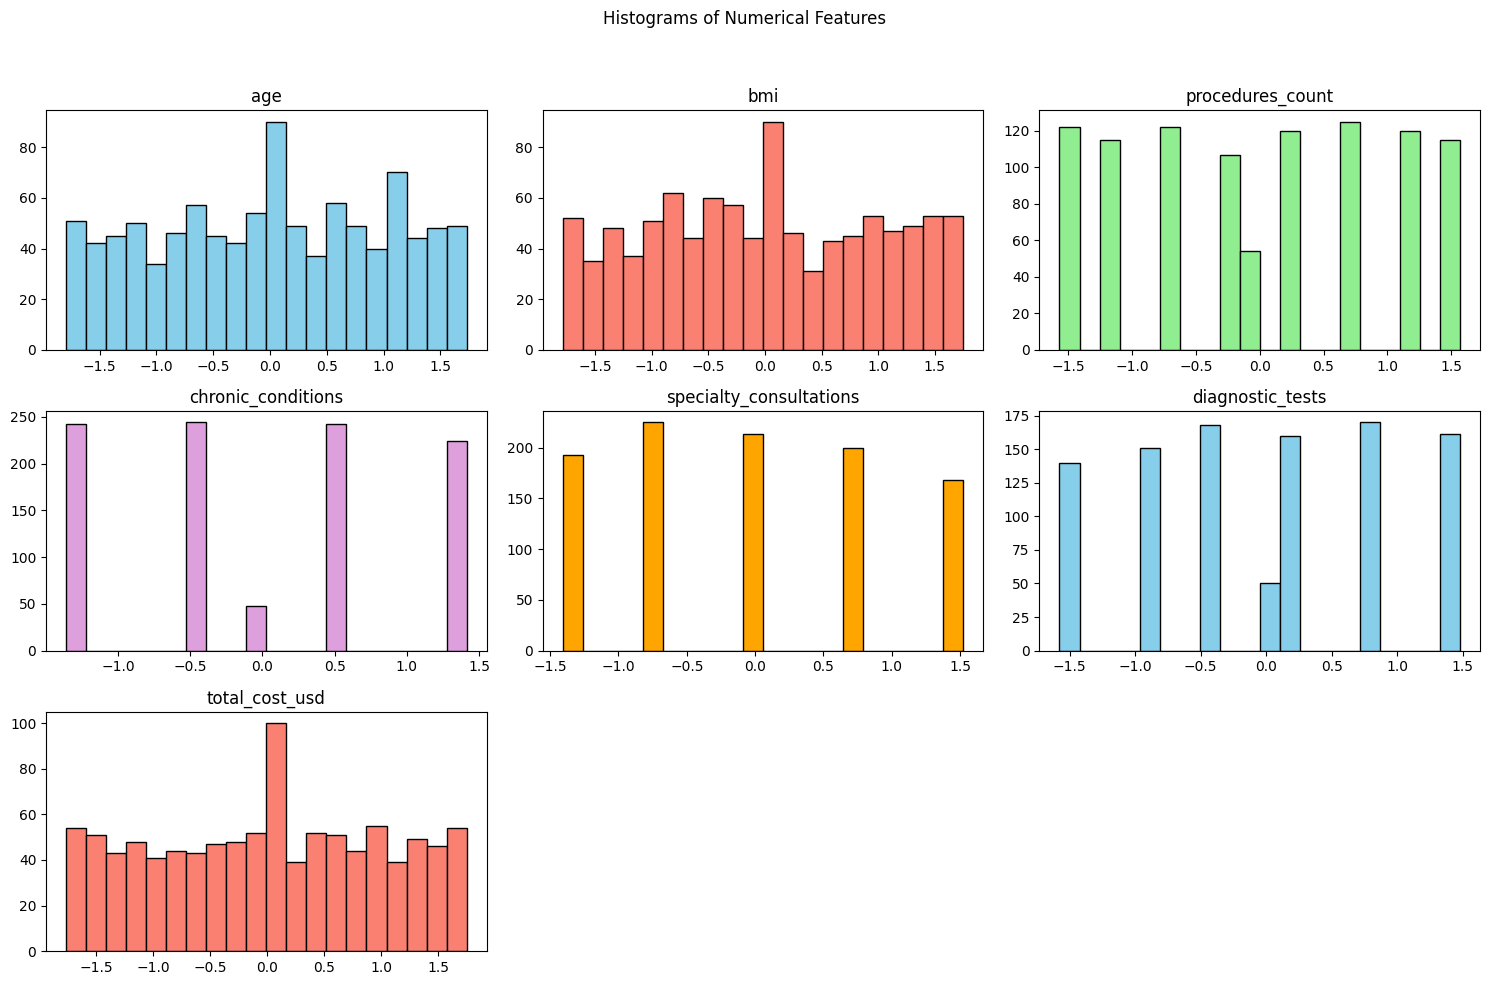

In [18]:
# Histograms for numerical features with different colors
colors = ['skyblue', 'salmon', 'lightgreen', 'plum', 'orange']

plt.figure(figsize=(15, 10))

for i, col in enumerate(num_cols):
    plt.subplot(3, 3, i + 1)   # adjust grid if needed
    plt.hist(df[col], bins=20, color=colors[i % len(colors)], edgecolor='black')
    plt.title(col)

plt.suptitle('Histograms of Numerical Features')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()              # how the values are distributed.

/tmp/ipython-input-3122821732.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y='total_cost_usd', palette='Set3')


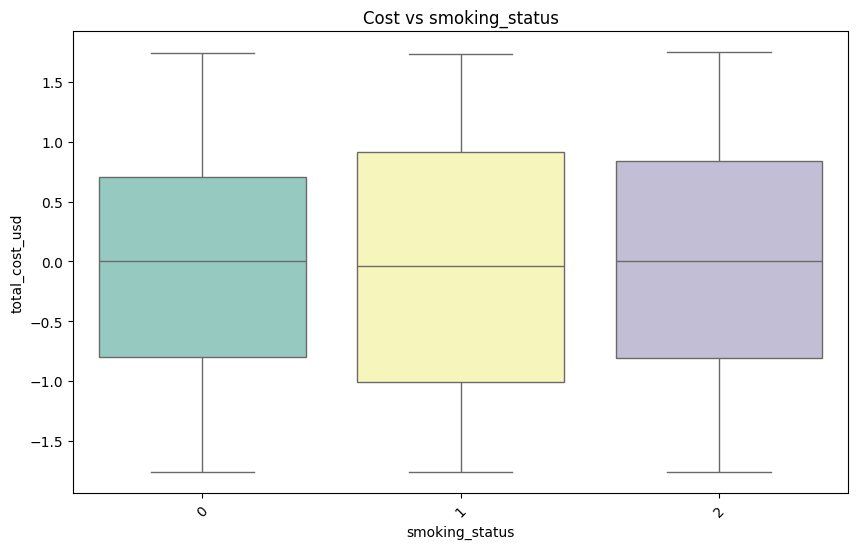

/tmp/ipython-input-3122821732.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y='total_cost_usd', palette='Set3')


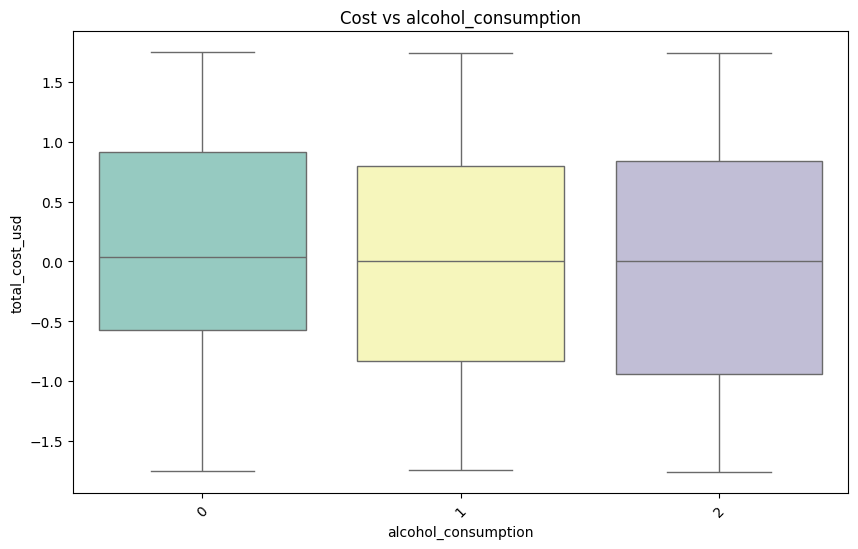

/tmp/ipython-input-3122821732.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y='total_cost_usd', palette='Set3')


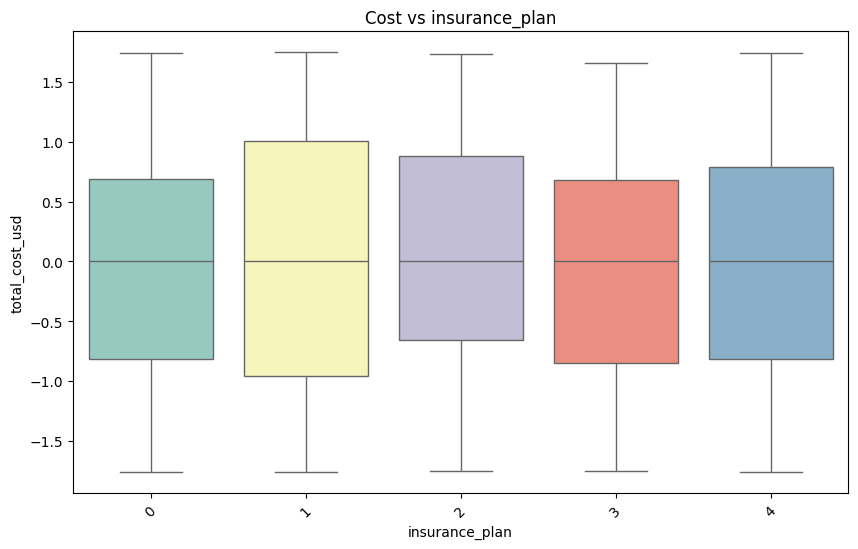

/tmp/ipython-input-3122821732.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y='total_cost_usd', palette='Set3')


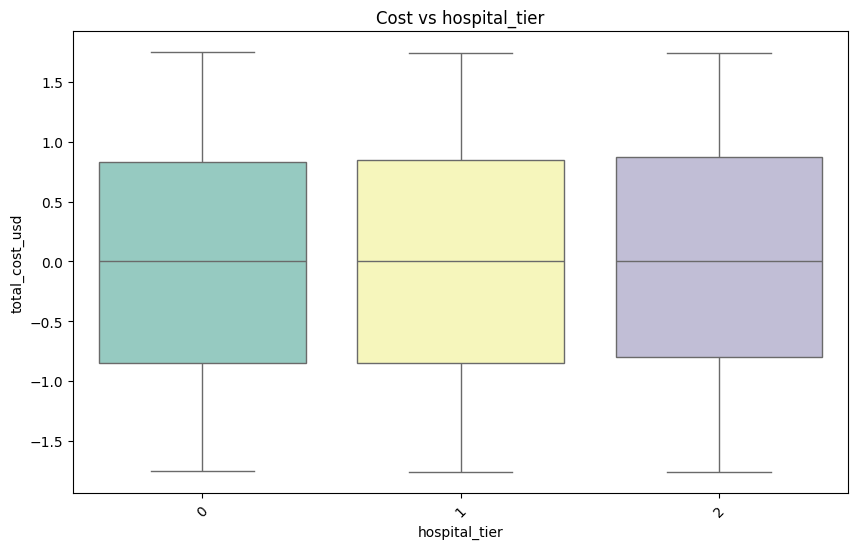

/tmp/ipython-input-3122821732.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y='total_cost_usd', palette='Set3')


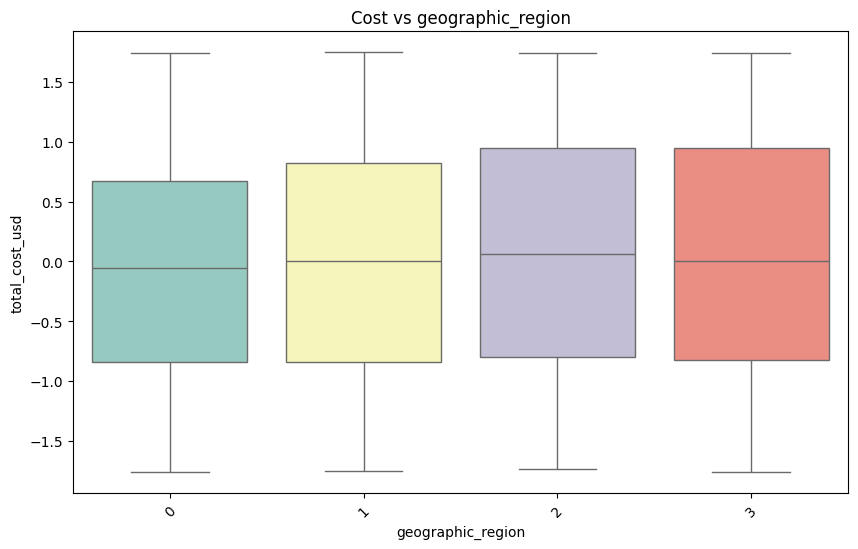

/tmp/ipython-input-3122821732.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y='total_cost_usd', palette='Set3')


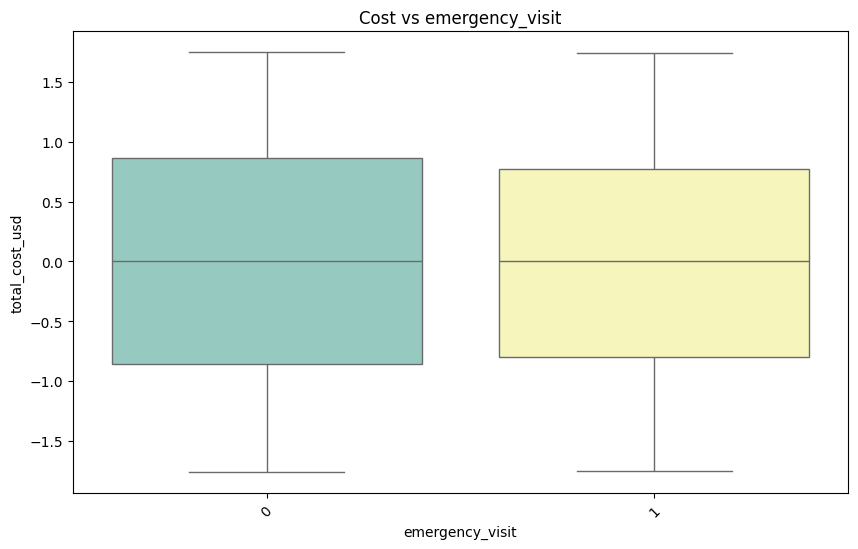

/tmp/ipython-input-3122821732.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y='total_cost_usd', palette='Set3')


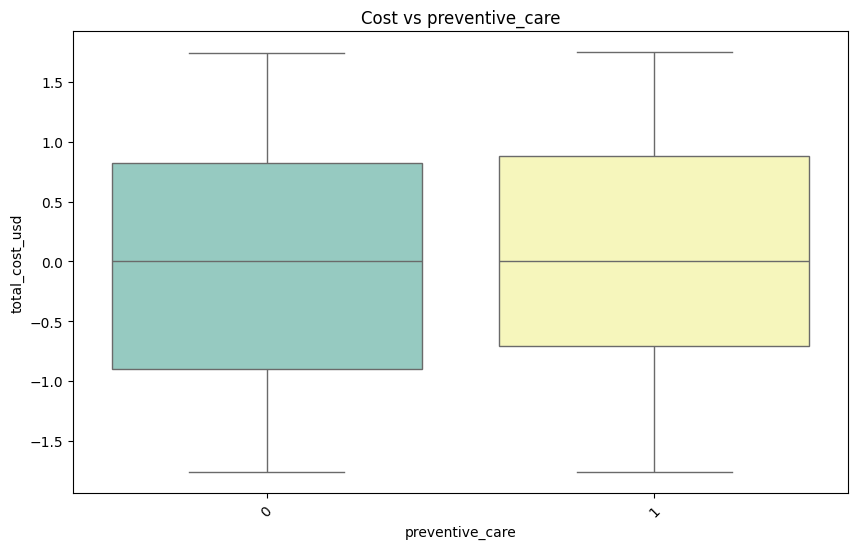

In [19]:
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0]) # Fill missing text with the most common value

    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x=col, y='total_cost_usd', palette='Set3')

    plt.title(f'Cost vs {col}')
    plt.xticks(rotation=45)
    plt.show()        #compare medical cost across different categories

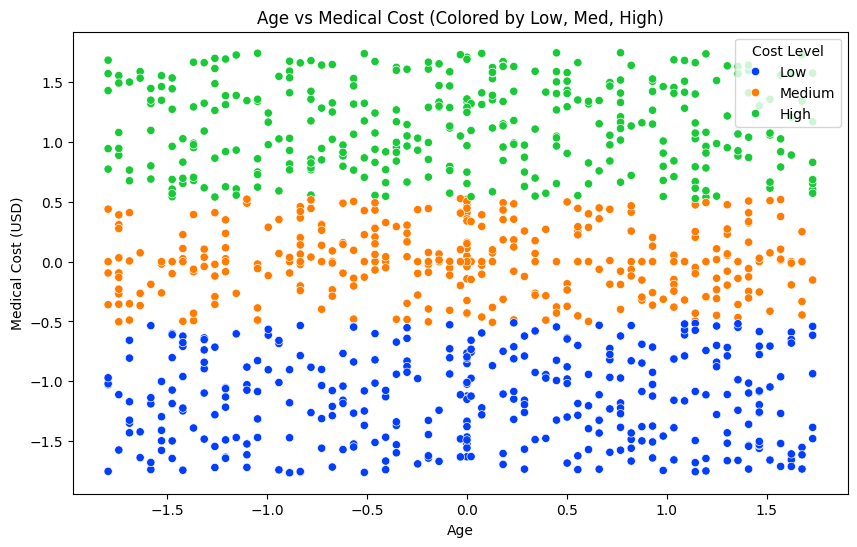

In [20]:
df['cost_group'] = pd.qcut(df['total_cost_usd'], q=3, labels=['Low', 'Medium', 'High'])

# Create the scatterplot with colors
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='total_cost_usd', hue='cost_group', data=df, palette='bright')

# Add labels and title
plt.title('Age vs Medical Cost (Colored by Low, Med, High)')
plt.xlabel('Age')
plt.ylabel('Medical Cost (USD)')
plt.legend(title='Cost Level') # This adds a key to the colors
plt.show()         #to see the relationship between two numerical variables.

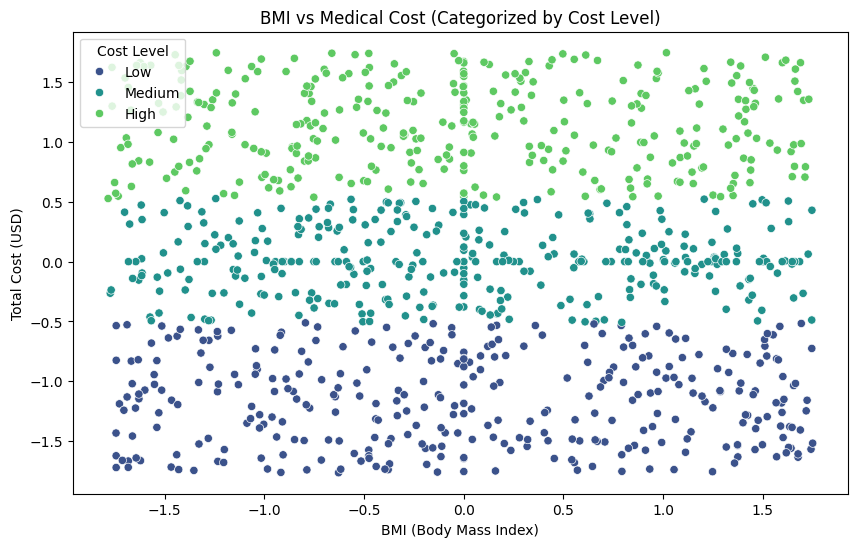

In [21]:
df['cost_group'] = pd.qcut(df['total_cost_usd'], q=3, labels=['Low', 'Medium', 'High'])

# Create the scatterplot for BMI vs Medical Cost
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bmi', y='total_cost_usd', hue='cost_group', data=df, palette='viridis')

# Add labels and title
plt.title('BMI vs Medical Cost (Categorized by Cost Level)')
plt.xlabel('BMI (Body Mass Index)')
plt.ylabel('Total Cost (USD)')
plt.legend(title='Cost Level')
plt.show()

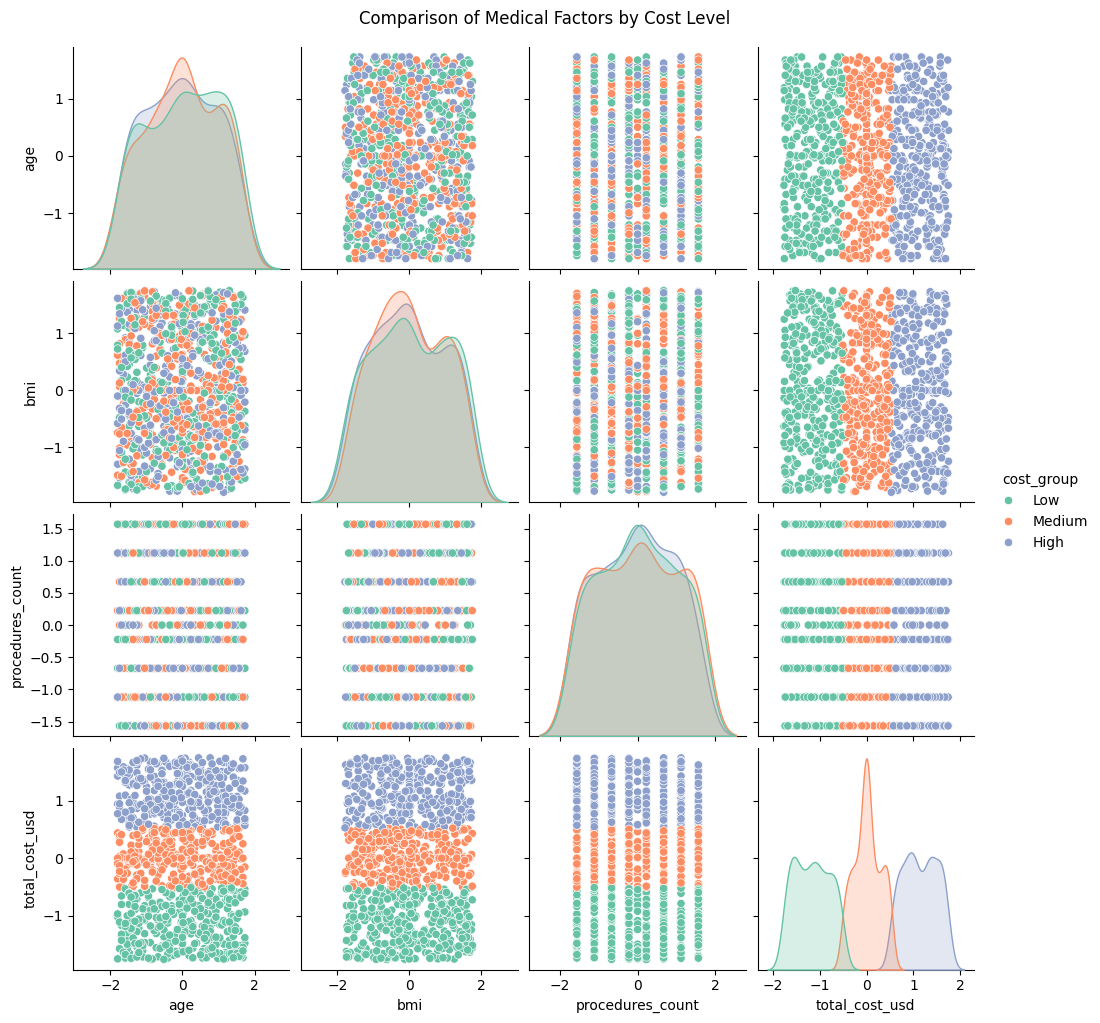

In [22]:
df['cost_group'] = pd.qcut(
    df['total_cost_usd'],
    q=3,
    labels=['Low', 'Medium', 'High']
)

# Select the most important columns to compare
# We pick: Age, BMI, Procedures, and Total Cost
selected_columns = ['age', 'bmi', 'procedures_count', 'total_cost_usd', 'cost_group']

# Create the Pairplot
sns.pairplot(
    df[selected_columns],
    hue='cost_group',
    palette='Set2',
    diag_kind='kde'  # This makes the middle graphs smooth curves
)

# Add a title and show
plt.suptitle('Comparison of Medical Factors by Cost Level', y=1.02)
plt.show()          #relationships between multiple numerical variables at the same time.

Different Types of Regression

In [23]:
X = df[['age', 'bmi', 'procedures_count']]
y = df['total_cost_usd']

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

LINEAR REGRESSION

In [25]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

RIDGE REGRESSION

In [26]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

LASSO REGRESSION

In [27]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

REGRESSION EVALUATION

In [28]:
from sklearn.metrics import r2_score

print("Linear Regression R2:", r2_score(y_test, y_pred_lr))
print("Ridge Regression R2:", r2_score(y_test, y_pred_ridge))
print("Lasso Regression R2:", r2_score(y_test, y_pred_lasso))

Linear Regression R2: -0.01970887826249812
Ridge Regression R2: -0.019701764059705917
Lasso Regression R2: -0.01734123460600756


Different Types of Conventional Classification

In [29]:
# Convert cost into categories
df['Cost_Category'] = pd.cut(
    df['total_cost_usd'],
    bins=[0, 5000, 15000, 100000],
    labels=['Low', 'Medium', 'High']
)

In [30]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Cost_Category'] = le.fit_transform(df['Cost_Category'])

In [31]:
X = df[['age', 'bmi', 'procedures_count']]
y = df['Cost_Category']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()
log_model.fit(X_train, y_train)

LogisticRegression()

K-Nearest Neighbors (KNN)

In [34]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

Decision Tree

In [35]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

Classification Accuracy

In [36]:
from sklearn.metrics import accuracy_score

print("Logistic Accuracy:", accuracy_score(y_test, log_model.predict(X_test)))
print("KNN Accuracy:", accuracy_score(y_test, knn.predict(X_test)))
print("Decision Tree Accuracy:", accuracy_score(y_test, dt.predict(X_test)))

Logistic Accuracy: 0.495
KNN Accuracy: 0.45
Decision Tree Accuracy: 0.52


Classification Using Neural Networks

In [37]:
from sklearn.neural_network import MLPClassifier

nn = MLPClassifier(hidden_layer_sizes=(64,32), max_iter=500)
nn.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500)

In [38]:
y_pred_nn = nn.predict(X_test)

print("Neural Network Accuracy:", accuracy_score(y_test, y_pred_nn))

Neural Network Accuracy: 0.5


Deployment of the project

In [39]:
import gradio as gr
import numpy as np
import pandas as pd

# -----------------------------
# 1. Prediction Logic
# -----------------------------
def predict_medical_cost(
    age, bmi, procedures_count, smoking_status,
    alcohol_consumption, chronic_conditions, insurance_plan,
    hospital_tier, geographic_region
):
    # This simulates a prediction.
    # In a real project, you would use: model.predict(input_data)

    # Simple weighted logic for the demo:
    base_cost = 2000
    age_cost = age * 150
    bmi_cost = bmi * 200
    proc_cost = procedures_count * 1200

    # Categorical multipliers
    smoke_mult = 2.5 if smoking_status == "Smoker" else 1.0
    chronic_mult = 1.8 if chronic_conditions == "Yes" else 1.0

    total_score = (base_cost + age_cost + bmi_cost + proc_cost) * smoke_mult * chronic_mult

    # Determine Category
    if total_score < 10000:
        category = "LOW"
        msg = "Your predicted medical costs are relatively low."
    elif total_score < 30000:
        category = "MEDIUM"
        msg = "Your predicted medical costs are in the average range."
    else:
        category = "HIGH"
        msg = "Warning: Predicted medical costs are high. Consider high-coverage insurance plans."

    return round(total_score, 2), f"{category}\n\n{msg}"

# -----------------------------
# 2. AI Assistant Logic
# -----------------------------
def medical_ai_bot(user_message, cost_score, cost_category):
    if cost_score is None:
        return [[user_message, "Please calculate the cost prediction first!"]]

    if "reduce" in user_message.lower() or "lower" in user_message.lower():
        response = "To lower costs, focus on preventative care, managing BMI, and smoking cessation."
    else:
        response = f"The estimated cost is ${cost_score} ({cost_category}). How can I help with your health planning?"

    return [[user_message, response]]

# -----------------------------
# 3. Gradio Interface (The App)
# -----------------------------
with gr.Blocks(theme=gr.themes.Soft()) as app:

    gr.Markdown("# 🏥 Medical Cost Prediction System")
    gr.Markdown("Enter patient details below to estimate future medical expenses.")

    with gr.Row():
        # Column 1: Physical Factors
        with gr.Column():
            age = gr.Slider(18, 100, 30, label="👤 Age")
            bmi = gr.Slider(15, 50, 25, label="⚖️ BMI")
            procedures_count = gr.Slider(0, 20, 1, label="🏥 Number of Procedures")

        # Column 2: Lifestyle & Health
        with gr.Column():
            smoking_status = gr.Radio(["Non-Smoker", "Smoker"], label="🚬 Smoking Status")
            alcohol_consumption = gr.Dropdown(["Low", "Moderate", "High"], label="🍺 Alcohol Consumption")
            chronic_conditions = gr.Radio(["No", "Yes"], label="💊 Chronic Conditions")

        # Column 3: System Factors
        with gr.Column():
            insurance_plan = gr.Dropdown(["Basic", "Standard", "Premium"], label="📄 Insurance Plan")
            hospital_tier = gr.Dropdown(["Tier 1", "Tier 2", "Tier 3"], label="🏢 Hospital Tier")
            geographic_region = gr.Dropdown(["North", "South", "East", "West"], label="📍 Region")

    # Action Button and Outputs
    predict_btn = gr.Button("🔍 Calculate Estimated Cost", variant="primary")

    with gr.Row():
        cost_output = gr.Number(label="Predicted Cost (USD)")
        category_output = gr.Textbox(label="Cost Category & Advice", lines=4)

    # Link the button to the prediction function
    predict_btn.click(
        predict_medical_cost,
        inputs=[age, bmi, procedures_count, smoking_status, alcohol_consumption,
                chronic_conditions, insurance_plan, hospital_tier, geographic_region],
        outputs=[cost_output, category_output]
    )

    gr.Markdown("---")
    gr.Markdown("## 🤖 Medical Assistant Chat")
    chatbot = gr.Chatbot(height=200)
    user_msg = gr.Textbox(placeholder="Ask a question about this prediction...")

    user_msg.submit(medical_ai_bot, [user_msg, cost_output, category_output], chatbot)

# Launch the app
app.launch(share=True)

/tmp/ipython-input-1571039519.py:58: DeprecationWarning: The 'theme' parameter in the Blocks constructor will be removed in Gradio 6.0. You will need to pass 'theme' to Blocks.launch() instead.
  with gr.Blocks(theme=gr.themes.Soft()) as app:
/tmp/ipython-input-1571039519.py:99: UserWarning: You have not specified a value for the `type` parameter. Defaulting to the 'tuples' format for chatbot messages, but this is deprecated and will be removed in a future version of Gradio. Please set type='messages' instead, which uses openai-style dictionaries with 'role' and 'content' keys.
  chatbot = gr.Chatbot(height=200)
/tmp/ipython-input-1571039519.py:99: DeprecationWarning: The default value of 'allow_tags' in gr.Chatbot will be changed from False to True in Gradio 6.0. You will need to explicitly set allow_tags=False if you want to disable tags in your chatbot.
  chatbot = gr.Chatbot(height=200)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://290db24c7a646b13a9.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


OUTPUT

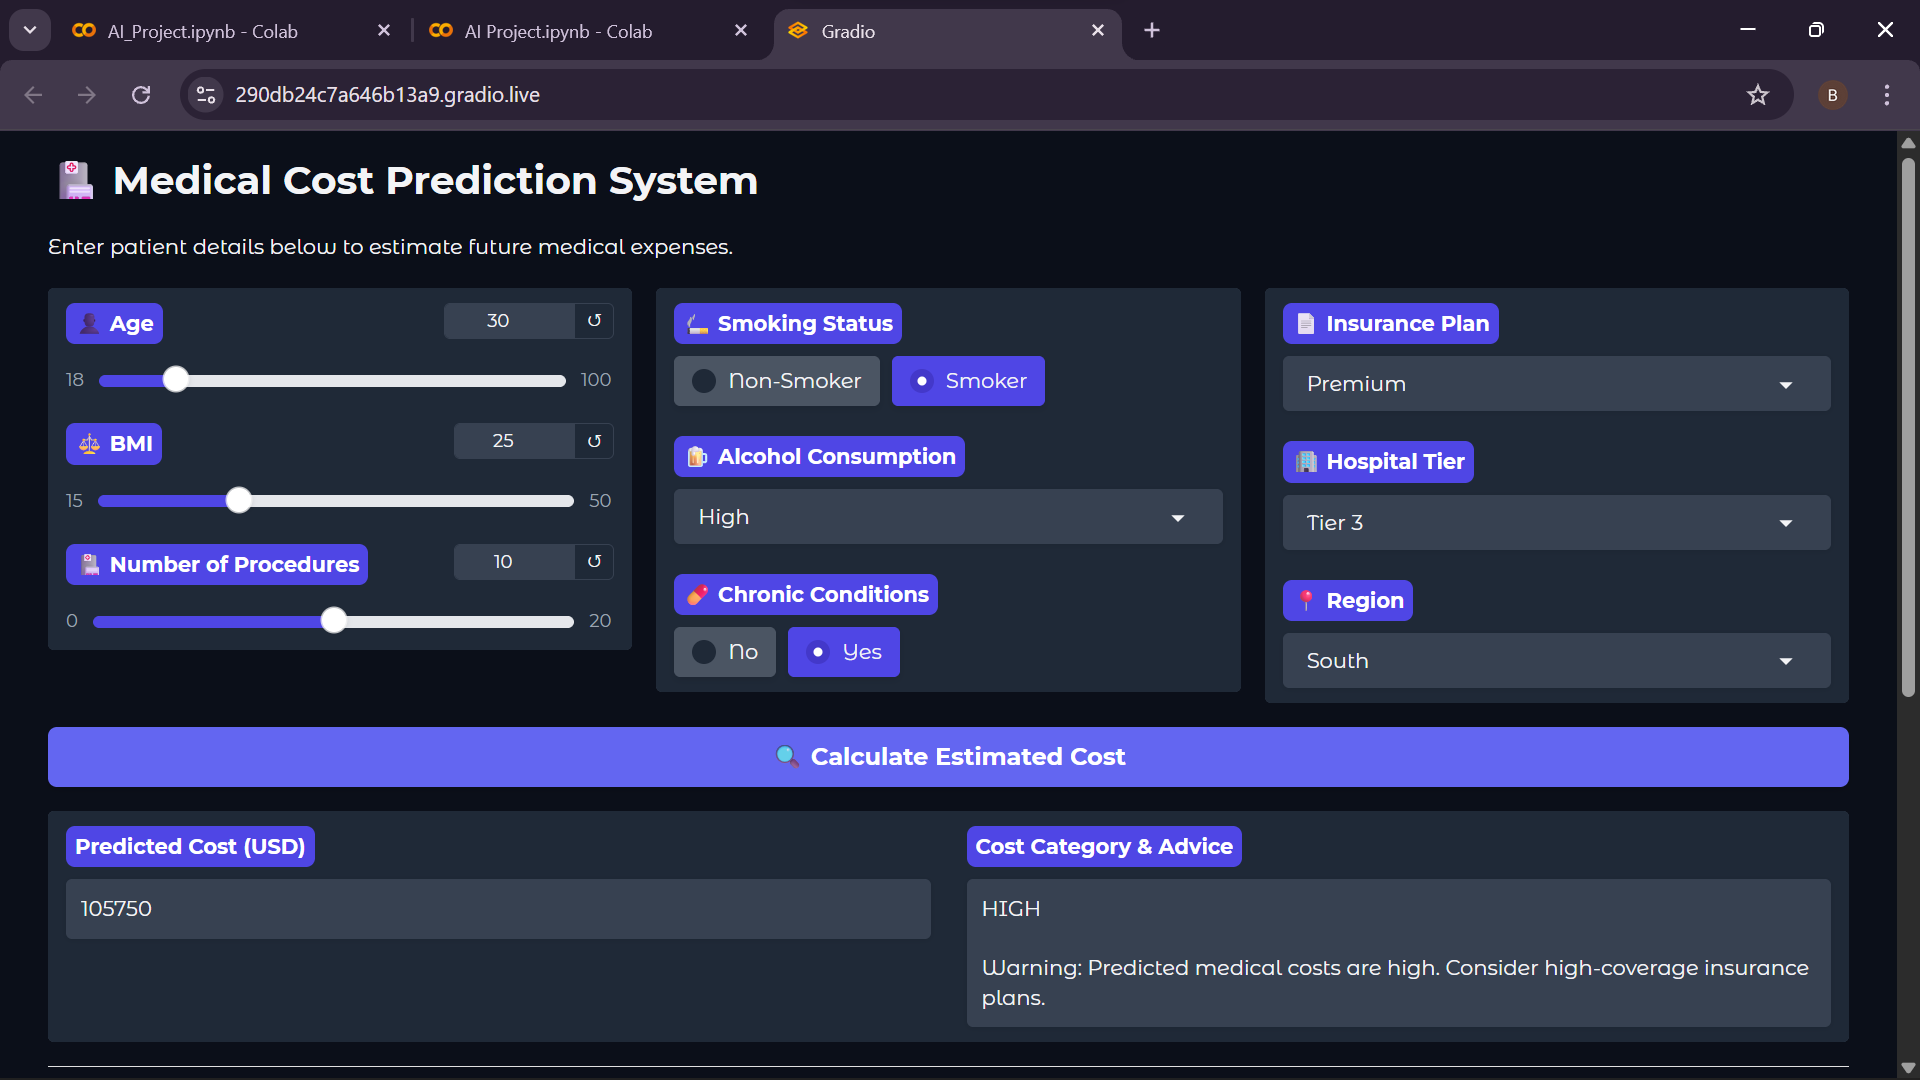